In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

testScoresData = pd.read_csv("Selection_dataset.csv")
testScoresData.info()
testScoresData.head()

lab = preprocessing.LabelEncoder()
X = lab.fit_transform(np.array(testScoresData["Test A"]))
Y = lab.fit_transform(np.array(testScoresData["Test B"]))

X_Train,X_Test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

model = LogisticRegression().fit(X_Train,Y_train)
score = model.score(X_Test,Y_test)
y_train_prediction = model.predict(X_Train)
y_test_prediction = model.predict(X_Test)


In [ ]:
# Cell block 2: Breast cancer data logistic regression
from sklearn.linear_model import LogisticRegression       # Importing logistic regression model
from sklearn.model_selection import train_test_split      # Importing train test split
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings

breastCancerData = pd.read_csv("Breast_Cancer_Data-P1.csv")
# Information about the data set
# breastCancerData.info()
# Columns within the data
# breastCancerData.head()

# Removing a column from the dataset
Diagnosis = pd.get_dummies(breastCancerData["diagnosis"],drop_first=True)
breastCancerData = pd.concat([breastCancerData,Diagnosis],axis = 1)
breastCancerData.drop(['id','diagnosis'], axis =1, inplace=True)

# Every row and column minus the header
X = breastCancerData.iloc[:,:-1].values
# Every row and column minus the header
Y = breastCancerData.iloc[:,-1].values

# Splitting the data set for test and training
X_Train,X_Test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

model = LogisticRegression().fit(X_Train,Y_train)   # Generate logistic regression method
score = model.score(X_Test,Y_test)                  # Test data scoring
print("Testing score: ",score)                      # Printing test data score
score = model.score(X_Train,Y_train)                # Training data scoring
print("Training score ", score)                     # Print training data score

C:\Users\Ryan\AppData\Local\Temp\ipykernel_2324\2667442966.py:13: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = titanic.corr().round(2)
C:\Users\Ryan\AppData\Local\Temp\ipykernel_2324\2667442966.py:21: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  encoder = OneHotEncoder(drop = 'first',dtype=np.int)
C:\Users\Ryan\AppData\Local\Packages\PythonSoftwareFounda

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

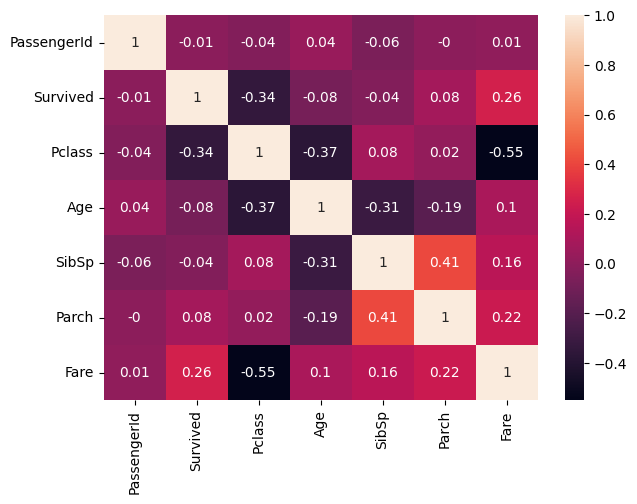

In [5]:
# Cell block 3: Titanic logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

titanic = pd.read_csv("Titanic-Dataset_1.csv")
titanic.isnull().sum()
plt.figure(figsize=(7,5))
correlation_matrix = titanic.corr().round(2)
sns.heatmap(data=correlation_matrix,annot=True)

titanic.drop("Cabin",axis=1,inplace=True)
titanic.dropna(inplace=True)

titanic.reset_index(drop=True,inplace=True)

encoder = OneHotEncoder(drop = 'first',dtype=np.int)
titanicN = titanic[['Pclass','Sex','Embarked']]
titanicN = encoder.fit_transform(titanicN).toarray()
titanicN = pd.DataFrame(titanicN)
titanic = pd.concat([titanic,titanicN])

titanic.drop(["Sex","Embarked","Pclass","PassengerId","Ticket","Name"],axis = 1,inplace=True)
titanic = titanic.dropna()
X = titanic.drop("Survived",axis=1)
Y = titanic["Survived"]

X_Train,X_Test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

model = LogisticRegression().fit(X_Train,Y_train)   # Generate logistic regression method
score = model.score(X_Test,Y_test)                  # Test data scoring
print("Testing score: ",score)                      # Printing test data score
score = model.score(X_Train,Y_train)                # Training data scoring
print("Training score ", score)                     # Print training data score